# Transformer architecture


In this notebook, we aim to evaluate the performance of the Transformer architecture.

In [1]:
import sys
import importlib
import pickle

# data manipulation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# data analysis
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

# pytorch specific
import torch
import torch.optim as optim
import torch.nn.functional as F
from tqdm import tqdm

# project specific
sys.path.append('../')
from src import config
from src.utils import experiment, helpers



from matplotlib.animation import FuncAnimation
from IPython.display import HTML

pd.options.display.width = 1000
DEVICE = torch.device(config["DEVICE"])

## Grid

Here we define the parametters to search through

In [2]:
# We first set the parametters that we do no want to change

data_params = { 
    "LS_threshold" : 0.0023,
    "MAD_threshold" : 1, 
    "MT_removal" : True, 
    "expression_threshold" : 0.1}

model_params = {
    "dropout" : 0.2,
    "latent_dim" : 64,
    "variational" : False,
    "convolution": False,
    "transformer" : True
    }



In [3]:
importlib.reload(helpers)
dynamic_params = {
    "latent_dim": [16, 32, 64, 128],
    "attention_size": [3, 2, 1],
}

configurations = helpers.generate_config(model_params, dynamic_params)

# Now, 'configurations' is a list of dictionaries, each with a unique combination of parameters.
# You can iterate over this list and pass each dictionary to your pipeline for experimentation.


In [4]:
print(configurations[0])
print(len(configurations))

{'dropout': 0.2, 'latent_dim': 16, 'variational': False, 'convolution': False, 'transformer': True, 'attention_size': 3}
12


loading samples...
removing 37 mithocondrial genes from the dataset
selecting genes based on expression threshold:  0.1 ...
removing 37862 genes under the expression threshold from the dataset
selecting genes based on median absolute deviation (MAD) threshold:  1 ...
removing 12484 genes under the MAD threshold from the dataset
selecting genes based on Laplacian Score (LS) threshold:  0.0023 ...
removing 8849 genes under the LS threshold from the dataset
number of genes selected :  1428
matching :  1428
log(1 + x) transformation...
scaling to [0, 1]...
shape of the dataset : (1231, 1428)
number of seq in the dataset : 1231
input shape : 1428
[1, 2, 3, 4, 6, 7, 12, 14, 17, 21, 28, 34, 42, 51, 68, 84, 102, 119, 204, 238, 357, 476, 714, 1428]


/opt/homebrew/anaconda3/envs/thesis/lib/python3.9/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


(1231, 1428)
(1231, 1, 1428)
train data: 1231


100%|██████████| 30/30 [00:25<00:00,  1.19it/s]


Silhouette score for 5 clusters: 0.30315136909484863


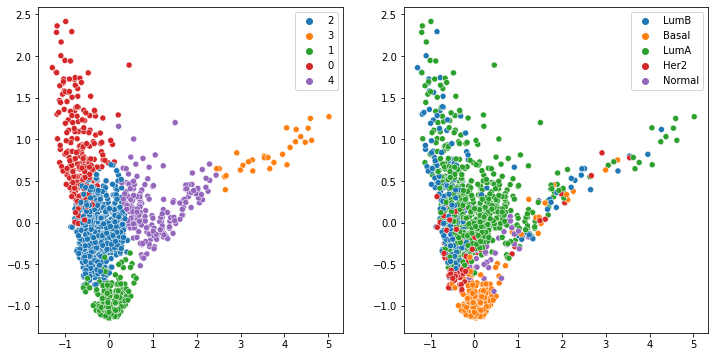

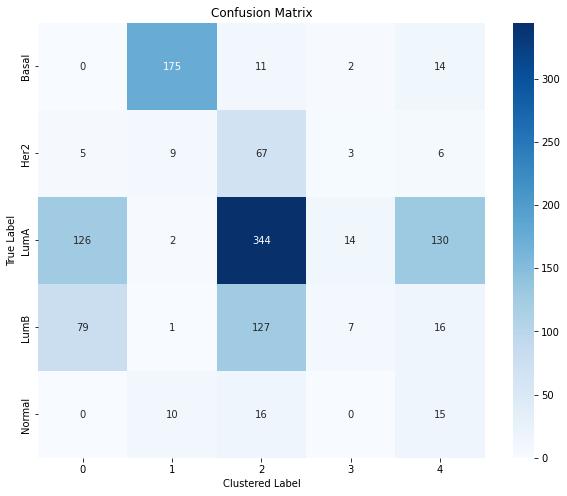

Adjusted Rand Index (ARI): 0.19
Normalized Mutual Information (NMI): 0.29
Fowlkes-Mallows Index: 0.46
Homogeneity: 0.29
Completeness: 0.28
V-measure: 0.29
Silhouette Score: 0.30
loading samples...
removing 37 mithocondrial genes from the dataset
selecting genes based on expression threshold:  0.1 ...
removing 37862 genes under the expression threshold from the dataset
selecting genes based on median absolute deviation (MAD) threshold:  1 ...
removing 12484 genes under the MAD threshold from the dataset
selecting genes based on Laplacian Score (LS) threshold:  0.0023 ...
removing 8849 genes under the LS threshold from the dataset
number of genes selected :  1428
matching :  1428
log(1 + x) transformation...
scaling to [0, 1]...
shape of the dataset : (1231, 1428)
number of seq in the dataset : 1231
input shape : 1428
[1, 2, 3, 4, 6, 7, 12, 14, 17, 21, 28, 34, 42, 51, 68, 84, 102, 119, 204, 238, 357, 476, 714, 1428]


/opt/homebrew/anaconda3/envs/thesis/lib/python3.9/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


(1231, 1428)
(1231, 1, 1428)
train data: 1231


100%|██████████| 30/30 [00:18<00:00,  1.64it/s]


Silhouette score for 5 clusters: 0.330812931060791


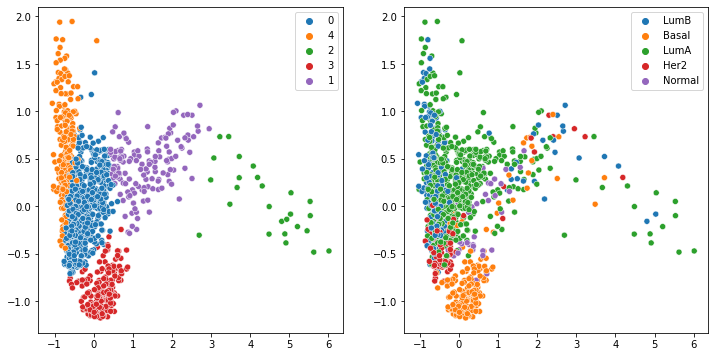

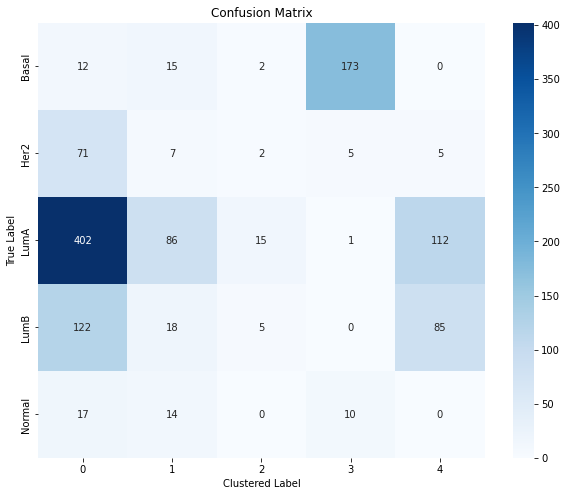

Adjusted Rand Index (ARI): 0.22
Normalized Mutual Information (NMI): 0.30
Fowlkes-Mallows Index: 0.49
Homogeneity: 0.30
Completeness: 0.30
V-measure: 0.30
Silhouette Score: 0.33
loading samples...
removing 37 mithocondrial genes from the dataset
selecting genes based on expression threshold:  0.1 ...
removing 37862 genes under the expression threshold from the dataset
selecting genes based on median absolute deviation (MAD) threshold:  1 ...
removing 12484 genes under the MAD threshold from the dataset
selecting genes based on Laplacian Score (LS) threshold:  0.0023 ...
removing 8849 genes under the LS threshold from the dataset
number of genes selected :  1428
matching :  1428
log(1 + x) transformation...
scaling to [0, 1]...
shape of the dataset : (1231, 1428)
number of seq in the dataset : 1231
input shape : 1428
[1, 2, 3, 4, 6, 7, 12, 14, 17, 21, 28, 34, 42, 51, 68, 84, 102, 119, 204, 238, 357, 476, 714, 1428]


/opt/homebrew/anaconda3/envs/thesis/lib/python3.9/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


(1231, 1428)
(1231, 1, 1428)
train data: 1231


100%|██████████| 30/30 [00:20<00:00,  1.49it/s]


Silhouette score for 5 clusters: 0.30887073278427124


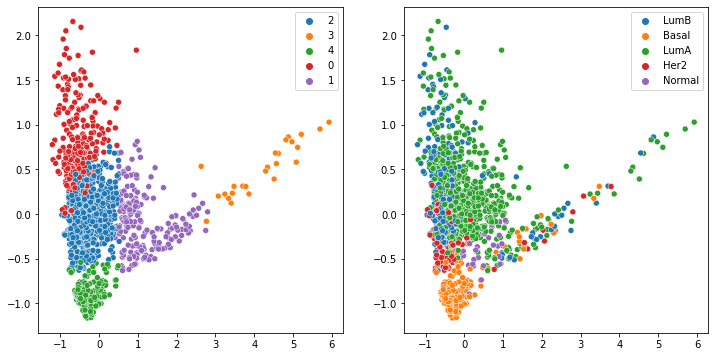

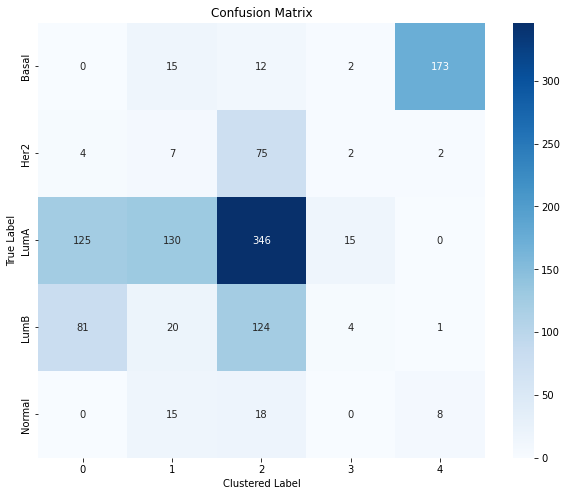

Adjusted Rand Index (ARI): 0.18
Normalized Mutual Information (NMI): 0.30
Fowlkes-Mallows Index: 0.46
Homogeneity: 0.30
Completeness: 0.29
V-measure: 0.30
Silhouette Score: 0.31


In [5]:
importlib.reload(experiment)
experiments = []

for config in configurations[:3]:
    e = experiment.Experiment(data_param=data_params, model_param=config, n_epoch= 30)
    e.run()

    experiment_data = {
            'config': config,
            'score': e.metric
        }
    experiments.append(experiment_data)




In [6]:
experiments

[{'config': {'dropout': 0.2,
   'latent_dim': 16,
   'variational': False,
   'convolution': False,
   'transformer': True,
   'attention_size': 3,
   'num_heads': 1428},
  'score': 0.2078946305557284},
 {'config': {'dropout': 0.2,
   'latent_dim': 16,
   'variational': False,
   'convolution': False,
   'transformer': True,
   'attention_size': 2,
   'num_heads': 1428},
  'score': 0.23506974571714276},
 {'config': {'dropout': 0.2,
   'latent_dim': 16,
   'variational': False,
   'convolution': False,
   'transformer': True,
   'attention_size': 1,
   'num_heads': 1428},
  'score': 0.17948009437613854}]

In [7]:
# Find the experiment with the highest score.
best_experiment = max(experiments, key=lambda exp: exp['score'])

# 'best_experiment' now holds the dictionary with the highest 'score' value.
best_config = best_experiment['config']
highest_score = best_experiment['score']

# You can print or otherwise use 'best_config' and 'highest_score' as needed.
print("Best configuration:", best_config)
print("Highest score:", highest_score)

Best configuration: {'dropout': 0.2, 'latent_dim': 16, 'variational': False, 'convolution': False, 'transformer': True, 'attention_size': 2, 'num_heads': 1428}
Highest score: 0.23506974571714276
